In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pathlib import Path

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("Libraries imported successfully!")

Libraries imported successfully!


In [4]:
data_fn = "../data/dl/FY2026_All_Contracts_Full_20251207_1.csv"

df = pd.read_csv(data_fn)

print(f"Loaded {len(df):,} records")
print(f"Data shape: {df.shape}")

/tmp/ipykernel_82408/662290530.py:3: DtypeWarning: Columns (47,68,71,72,81,107,108,115,116,117,118,135,136,165,179,180) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_fn)


Loaded 192,181 records
Data shape: (192181, 297)


In [8]:
[x for x in list(df.columns) if 'type' in x]

['award_type_code',
 'award_type',
 'idv_type_code',
 'idv_type',
 'type_of_idc_code',
 'type_of_idc',
 'type_of_contract_pricing_code',
 'type_of_contract_pricing',
 'action_type_code',
 'action_type',
 'type_of_set_aside_code',
 'type_of_set_aside',
 'parent_award_type_code',
 'parent_award_type',
 'organizational_type']

In [10]:
df.groupby('award_type').count()

,contract_transaction_unique_key,contract_award_unique_key,award_id_piid,modification_number,transaction_number,parent_award_agency_id,parent_award_agency_name,parent_award_id_piid,parent_award_modification_number,federal_action_obligation,total_dollars_obligated,total_outlayed_amount_for_overall_award,base_and_exercised_options_value,current_total_value_of_award,base_and_all_options_value,potential_total_value_of_award,disaster_emergency_fund_codes_for_overall_award,outlayed_amount_from_COVID-19_supplementals_for_overall_award,obligated_amount_from_COVID-19_supplementals_for_overall_award,outlayed_amount_from_IIJA_supplemental_for_overall_award,obligated_amount_from_IIJA_supplemental_for_overall_award,action_date,action_date_fiscal_year,period_of_performance_start_date,period_of_performance_current_end_date,period_of_performance_potential_end_date,ordering_period_end_date,solicitation_date,awarding_agency_code,awarding_agency_name,awarding_sub_agency_code,awarding_sub_agency_name,awarding_office_code,awarding_office_name,funding_agency_code,funding_agency_name,funding_sub_agency_code,funding_sub_agency_name,funding_office_code,funding_office_name,treasury_accounts_funding_this_award,federal_accounts_funding_this_award,object_classes_funding_this_award,program_activities_funding_this_award,foreign_funding,foreign_funding_description,sam_exception,sam_exception_description,recipient_uei,recipient_duns,recipient_name,recipient_name_raw,recipient_doing_business_as_name,cage_code,recipient_parent_uei,recipient_parent_duns,recipient_parent_name,recipient_parent_name_raw,recipient_country_code,recipient_country_name,recipient_address_line_1,recipient_address_line_2,recipient_city_name,prime_award_transaction_recipient_county_fips_code,recipient_county_name,prime_award_transaction_recipient_state_fips_code,recipient_state_code,recipient_state_name,recipient_zip_4_code,prime_award_transaction_recipient_cd_original,prime_award_transaction_recipient_cd_current,recipient_phone_number,recipient_fax_number,primary_place_of_performance_country_code,primary_place_of_performance_country_name,primary_place_of_performance_city_name,prime_award_transaction_place_of_performance_county_fips_code,primary_place_of_performance_county_name,prime_award_transaction_place_of_performance_state_fips_code,primary_place_of_performance_state_code,primary_place_of_performance_state_name,primary_place_of_performance_zip_4,prime_award_transaction_place_of_performance_cd_original,prime_award_transaction_place_of_performance_cd_current,award_or_idv_flag,award_type_code,idv_type_code,idv_type,multiple_or_single_award_idv_code,multiple_or_single_award_idv,type_of_idc_code,type_of_idc,type_of_contract_pricing_code,type_of_contract_pricing,transaction_description,prime_award_base_transaction_description,action_type_code,action_type,solicitation_identifier,number_of_actions,inherently_governmental_functions,inherently_governmental_functions_description,product_or_service_code,product_or_service_code_description,contract_bundling_code,contract_bundling,dod_claimant_program_code,dod_claimant_program_description,naics_code,naics_description,recovered_materials_sustainability_code,recovered_materials_sustainability,domestic_or_foreign_entity_code,domestic_or_foreign_entity,dod_acquisition_program_code,dod_acquisition_program_description,information_technology_commercial_item_category_code,information_technology_commercial_item_category,epa_designated_product_code,epa_designated_product,country_of_product_or_service_origin_code,country_of_product_or_service_origin,place_of_manufacture_code,place_of_manufacture,subcontracting_plan_code,subcontracting_plan,extent_competed_code,extent_competed,solicitation_procedures_code,solicitation_procedures,type_of_set_aside_code,type_of_set_aside,evaluated_preference_code,evaluated_preference,research_code,research,fair_opportunity_limited_sources_code,fair_opportunity_limited_sources,other_than_full_and_open_competition_code,other_than_

In [11]:
[x for x in list(df.columns) if 'award_id' in x]

['award_id_piid',
 'parent_award_id_piid',
 'multiple_or_single_award_idv_code',
 'multiple_or_single_award_idv']

In [19]:
df.parent_award_id_piid.nunique()

13459

In [5]:
df.head()

,contract_transaction_unique_key,contract_award_unique_key,award_id_piid,modification_number,transaction_number,parent_award_agency_id,parent_award_agency_name,parent_award_id_piid,parent_award_modification_number,federal_action_obligation,total_dollars_obligated,total_outlayed_amount_for_overall_award,base_and_exercised_options_value,current_total_value_of_award,base_and_all_options_value,potential_total_value_of_award,disaster_emergency_fund_codes_for_overall_award,outlayed_amount_from_COVID-19_supplementals_for_overall_award,obligated_amount_from_COVID-19_supplementals_for_overall_award,outlayed_amount_from_IIJA_supplemental_for_overall_award,obligated_amount_from_IIJA_supplemental_for_overall_award,action_date,action_date_fiscal_year,period_of_performance_start_date,period_of_performance_current_end_date,period_of_performance_potential_end_date,ordering_period_end_date,solicitation_date,awarding_agency_code,awarding_agency_name,awarding_sub_agency_code,awarding_sub_agency_name,awarding_office_code,awarding_office_name,funding_agency_code,funding_agency_name,funding_sub_agency_code,funding_sub_agency_name,funding_office_code,funding_office_name,treasury_accounts_funding_this_award,federal_accounts_funding_this_award,object_classes_funding_this_award,program_activities_funding_this_award,foreign_funding,foreign_funding_description,sam_exception,sam_exception_description,recipient_uei,recipient_duns,recipient_name,recipient_name_raw,recipient_doing_business_as_name,cage_code,recipient_parent_uei,recipient_parent_duns,recipient_parent_name,recipient_parent_name_raw,recipient_country_code,recipient_country_name,recipient_address_line_1,recipient_address_line_2,recipient_city_name,prime_award_transaction_recipient_county_fips_code,recipient_county_name,prime_award_transaction_recipient_state_fips_code,recipient_state_code,recipient_state_name,recipient_zip_4_code,prime_award_transaction_recipient_cd_original,prime_award_transaction_recipient_cd_current,recipient_phone_number,recipient_fax_number,primary_place_of_performance_country_code,primary_place_of_performance_country_name,primary_place_of_performance_city_name,prime_award_transaction_place_of_performance_county_fips_code,primary_place_of_performance_county_name,prime_award_transaction_place_of_performance_state_fips_code,primary_place_of_performance_state_code,primary_place_of_performance_state_name,primary_place_of_performance_zip_4,prime_award_transaction_place_of_performance_cd_original,prime_award_transaction_place_of_performance_cd_current,award_or_idv_flag,award_type_code,award_type,idv_type_code,idv_type,multiple_or_single_award_idv_code,multiple_or_single_award_idv,type_of_idc_code,type_of_idc,type_of_contract_pricing_code,type_of_contract_pricing,transaction_description,prime_award_base_transaction_description,action_type_code,action_type,solicitation_identifier,number_of_actions,inherently_governmental_functions,inherently_governmental_functions_description,product_or_service_code,product_or_service_code_description,contract_bundling_code,contract_bundling,dod_claimant_program_code,dod_claimant_program_description,naics_code,naics_description,recovered_materials_sustainability_code,recovered_materials_sustainability,domestic_or_foreign_entity_code,domestic_or_foreign_entity,dod_acquisition_program_code,dod_acquisition_program_description,information_technology_commercial_item_category_code,information_technology_commercial_item_category,epa_designated_product_code,epa_designated_product,country_of_product_or_service_origin_code,country_of_product_or_service_origin,place_of_manufacture_code,place_of_manufacture,subcontracting_plan_code,subcontracting_plan,extent_competed_code,extent_competed,solicitation_procedures_code,solicitation_procedures,type_of_set_aside_code,type_of_set_aside,evaluated_preference_code,evaluated_preference,research_code,research,fair_opportunity_limited_sources_code,fair_opportunity_limited_sources,other_than_full_and_open_competition_code,

In [6]:
# Create a small sample dataframe for testing
smol = df.iloc[0:1_000]

print(f"Sample size: {len(smol)} records")
smol.head()

Sample size: 1000 records


,contract_transaction_unique_key,contract_award_unique_key,award_id_piid,modification_number,transaction_number,parent_award_agency_id,parent_award_agency_name,parent_award_id_piid,parent_award_modification_number,federal_action_obligation,total_dollars_obligated,total_outlayed_amount_for_overall_award,base_and_exercised_options_value,current_total_value_of_award,base_and_all_options_value,potential_total_value_of_award,disaster_emergency_fund_codes_for_overall_award,outlayed_amount_from_COVID-19_supplementals_for_overall_award,obligated_amount_from_COVID-19_supplementals_for_overall_award,outlayed_amount_from_IIJA_supplemental_for_overall_award,obligated_amount_from_IIJA_supplemental_for_overall_award,action_date,action_date_fiscal_year,period_of_performance_start_date,period_of_performance_current_end_date,period_of_performance_potential_end_date,ordering_period_end_date,solicitation_date,awarding_agency_code,awarding_agency_name,awarding_sub_agency_code,awarding_sub_agency_name,awarding_office_code,awarding_office_name,funding_agency_code,funding_agency_name,funding_sub_agency_code,funding_sub_agency_name,funding_office_code,funding_office_name,treasury_accounts_funding_this_award,federal_accounts_funding_this_award,object_classes_funding_this_award,program_activities_funding_this_award,foreign_funding,foreign_funding_description,sam_exception,sam_exception_description,recipient_uei,recipient_duns,recipient_name,recipient_name_raw,recipient_doing_business_as_name,cage_code,recipient_parent_uei,recipient_parent_duns,recipient_parent_name,recipient_parent_name_raw,recipient_country_code,recipient_country_name,recipient_address_line_1,recipient_address_line_2,recipient_city_name,prime_award_transaction_recipient_county_fips_code,recipient_county_name,prime_award_transaction_recipient_state_fips_code,recipient_state_code,recipient_state_name,recipient_zip_4_code,prime_award_transaction_recipient_cd_original,prime_award_transaction_recipient_cd_current,recipient_phone_number,recipient_fax_number,primary_place_of_performance_country_code,primary_place_of_performance_country_name,primary_place_of_performance_city_name,prime_award_transaction_place_of_performance_county_fips_code,primary_place_of_performance_county_name,prime_award_transaction_place_of_performance_state_fips_code,primary_place_of_performance_state_code,primary_place_of_performance_state_name,primary_place_of_performance_zip_4,prime_award_transaction_place_of_performance_cd_original,prime_award_transaction_place_of_performance_cd_current,award_or_idv_flag,award_type_code,award_type,idv_type_code,idv_type,multiple_or_single_award_idv_code,multiple_or_single_award_idv,type_of_idc_code,type_of_idc,type_of_contract_pricing_code,type_of_contract_pricing,transaction_description,prime_award_base_transaction_description,action_type_code,action_type,solicitation_identifier,number_of_actions,inherently_governmental_functions,inherently_governmental_functions_description,product_or_service_code,product_or_service_code_description,contract_bundling_code,contract_bundling,dod_claimant_program_code,dod_claimant_program_description,naics_code,naics_description,recovered_materials_sustainability_code,recovered_materials_sustainability,domestic_or_foreign_entity_code,domestic_or_foreign_entity,dod_acquisition_program_code,dod_acquisition_program_description,information_technology_commercial_item_category_code,information_technology_commercial_item_category,epa_designated_product_code,epa_designated_product,country_of_product_or_service_origin_code,country_of_product_or_service_origin,place_of_manufacture_code,place_of_manufacture,subcontracting_plan_code,subcontracting_plan,extent_competed_code,extent_competed,solicitation_procedures_code,solicitation_procedures,type_of_set_aside_code,type_of_set_aside,evaluated_preference_code,evaluated_preference,research_code,research,fair_opportunity_limited_sources_code,fair_opportunity_limited_sources,other_than_full_and_open_competition_code,

In [7]:
list(smol.columns)

['contract_transaction_unique_key',
 'contract_award_unique_key',
 'award_id_piid',
 'modification_number',
 'transaction_number',
 'parent_award_agency_id',
 'parent_award_agency_name',
 'parent_award_id_piid',
 'parent_award_modification_number',
 'federal_action_obligation',
 'total_dollars_obligated',
 'total_outlayed_amount_for_overall_award',
 'base_and_exercised_options_value',
 'current_total_value_of_award',
 'base_and_all_options_value',
 'potential_total_value_of_award',
 'disaster_emergency_fund_codes_for_overall_award',
 'outlayed_amount_from_COVID-19_supplementals_for_overall_award',
 'obligated_amount_from_COVID-19_supplementals_for_overall_award',
 'outlayed_amount_from_IIJA_supplemental_for_overall_award',
 'obligated_amount_from_IIJA_supplemental_for_overall_award',
 'action_date',
 'action_date_fiscal_year',
 'period_of_performance_start_date',
 'period_of_performance_current_end_date',
 'period_of_performance_potential_end_date',
 'ordering_period_end_date',
 'solic

In [8]:
# # Get value counts for all fields in smol
# for col in smol.columns:
#     print(f"\n{'='*60}")
#     print(f"Column: {col}")
#     print(f"{'='*60}")
#     print(smol[col].value_counts())
#     print(f"\nUnique values: {smol[col].nunique()}")
#     print(f"Null count: {smol[col].isna().sum()}")

In [14]:
# Create summary dataframe for all columns in smol
summary_data = []

for col in smol.columns:
    # Get value counts
    value_counts = smol[col].value_counts()
    
    # Get top 3 values and their counts
    top_3 = []
    for i in range(min(3, len(value_counts))):
        val = value_counts.index[i]
        count = value_counts.iloc[i]
        top_3.append(f"{val} ({count})")
    
    # Fill with empty strings if less than 3 unique values
    while len(top_3) < 3:
        top_3.append("")
    
    summary_data.append({
        'column': col,
        'unique_values': smol[col].nunique(),
        'null_count': smol[col].isna().sum(),
        'top_1': top_3[0],
        'top_2': top_3[1],
        'top_3': top_3[2]
    })

# Create summary dataframe
summary_df = pd.DataFrame(summary_data)
print(f"Summary of {len(summary_df)} columns in smol dataframe:")

# Display all rows
with pd.option_context('display.max_rows', None):
    display(summary_df)

Summary of 300 columns in smol dataframe:


,column,unique_values,null_count,top_1,top_2,top_3
0,contract_transaction_unique_key,1000,0,7524_-NONE-_75F40123C00186_P00003_-NONE-_0 (1),1540_4740_15B11925F00000049_P00005_47PA0418D00...,9100_-NONE-_91990025C0005_P00003_-NONE-_0 (1)
1,contract_award_unique_key,995,0,CONT_IDV_47QSEA23D000F_4732 (2),CONT_IDV_GS00F115CA_4732 (2),CONT_IDV_GS07F0372X_4732 (2)
2,award_id_piid,994,0,47QSEA23D000F (2),GS00F115CA (2),36C25622F0096 (2)
3,modification_number,140,0,0 (187),P00001 (166),PSA907 (152)
4,transaction_number,1,323,0.0 (677),,
5,parent_award_agency_id,53,601,3600 (68),4732 (63),8000 (32)
6,parent_award_agency_name,52,601,FEDERAL ACQUISITION SERVICE (71),"VETERANS AFFAIRS, DEPARTMENT OF (68)",NATIONAL AERONAUTICS AND SPACE ADMINISTRATION ...
7,parent_award_id_piid,354,601,36W79720D0001 (6),36C10X23D0032 (4),NNG15SD60B (4)
8,parent_award_modification_number,83,601,0 (263),P00008 (6),P00004 (5)
9,federal_action_obligation,494,0,0.0 (492),10000.0 (4),15000.0 (3)


Top records by transaction_description length:


/tmp/ipykernel_65400/3418658279.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smol['transaction_description_len'] = smol['transaction_description'].fillna('').astype(str).str.len()
/tmp/ipykernel_65400/3418658279.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smol['prime_award_base_transaction_description_len'] = smol['prime_award_base_transaction_description'].fillna('').astype(str).str.len()
/tmp/ipykernel_65400/3418658279.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

,transaction_description,prime_award_base_transaction_description,product_or_service_code_description,transaction_description_len,prime_award_base_transaction_description_len,product_or_service_code_description_len
126,DPAS RATING DO-C9. THE EXPLORATION AND SPACE ...,THE EXPLORATION AND SPACE COMMUNICATIONS PROJE...,IT AND TELECOM- INTEGRATED HARDWARE/SOFTWARE/S...,899,879,87
678,GAMMA RAY LARGE AREA SPACE TELESCOPE (GLAST).T...,GAMMA RAY LARGE AREA SPACE TELESCOPE (GLAST). ...,R&D- SPACE: FLIGHT (APPLIED RESEARCH/EXPLORATO...,388,390,61
554,ADD THREE (3) ADDITIONAL IT SERVICE DESK PERSO...,POOL A SERVICE DESK SERVICE DESK,IT AND TELECOM - IT MANAGEMENT SUPPORT SERVICE...,250,32,55
911,"THE OBJECTIVE IS TO PROCURE SAFE, RELIABLE, AN...","THE OBJECTIVE IS TO PROCURE SAFE, RELIABLE, AN...",GENERAL SCIENCE & TECHNOLOGY R&D SVCS; GENERAL...,250,250,93
7,USAGM IS DEOBLIGATING FUNDS ASSOCIATED WITH TH...,"A NEW CALL ORDER FOR SALMAN IDRIS, URDU SERVICE.",SUPPORT- PROFESSIONAL: OTHER,250,48,28
...,...,...,...,...,...,...
420,NSHQ ETEE,NSHQ ETEE,SUPPORT- PROFESSIONAL: OTHER,9,9,28
221,ADDITION,"65 I B, DRUGS, PHARMACEUTICALS,&HEMATOLOGY REL...",DRUGS AND BIOLOGICALS,8,79,21
873,FUNDING,YEAR 5 CLIN 0003 - LONGER TERM OPERATIONS AND ...,ENVIRONMENTAL SYSTEMS PROTECTION- ENVIRONMENTA...,7,71,59
71,P00008,"EFAST PA 24-009-NW ""DEVELOPING 3D DIGITAL TWIN...",SUPPORT- PROFESSIONAL: OTHER,6,80,28


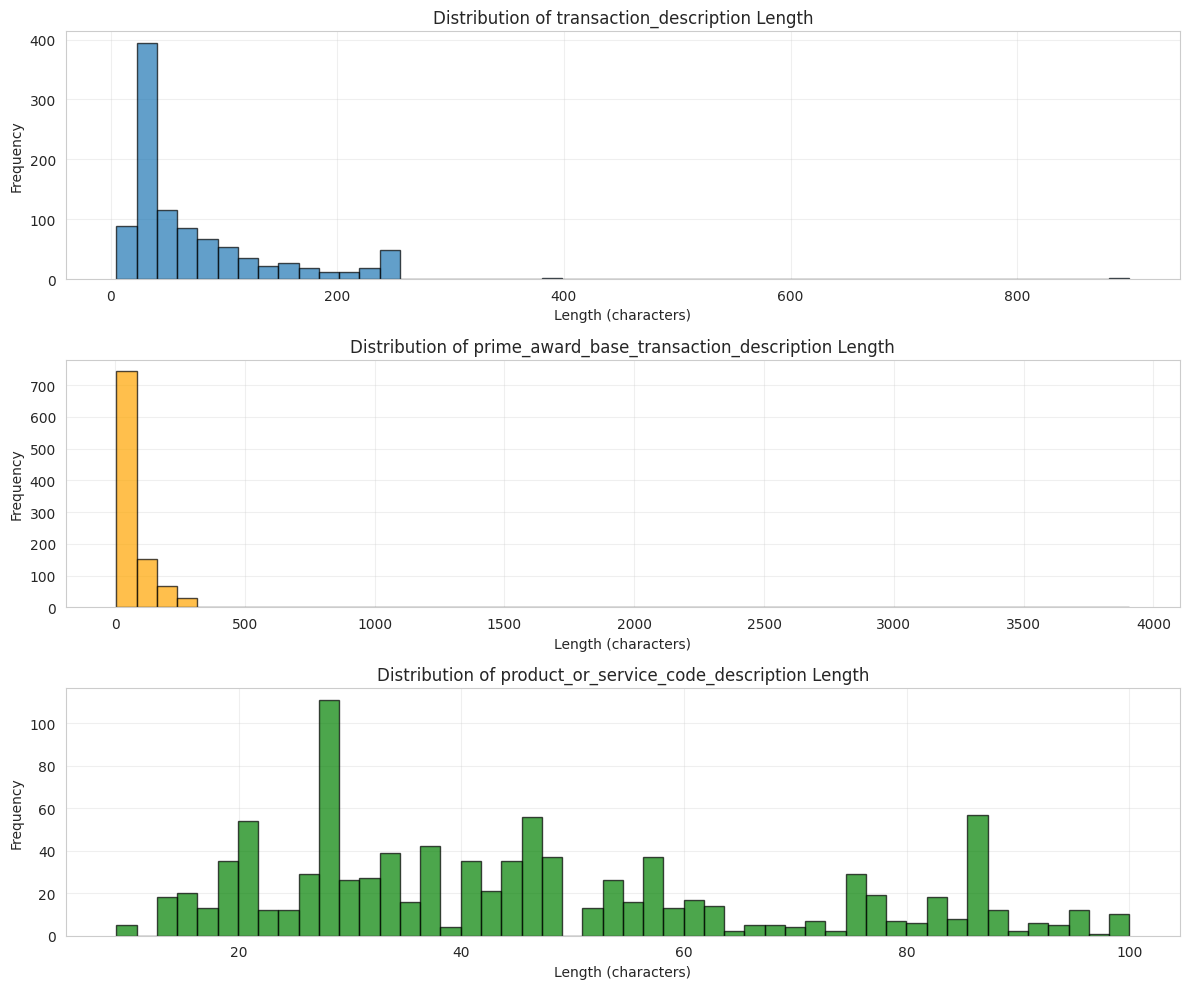


Summary Statistics:
transaction_description - Mean: 73.79, Max: 899, Min: 5
prime_award_base_transaction_description - Mean: 74.70, Max: 3907, Min: 5
product_or_service_code_description - Mean: 46.31, Max: 100, Min: 9


In [10]:
# Create calculated fields for description lengths
smol['transaction_description_len'] = smol['transaction_description'].fillna('').astype(str).str.len()
smol['prime_award_base_transaction_description_len'] = smol['prime_award_base_transaction_description'].fillna('').astype(str).str.len()
smol['product_or_service_code_description_len'] = smol['product_or_service_code_description'].fillna('').astype(str).str.len()

# Display dataframe sorted by transaction_description length (descending)
display_cols = ['transaction_description', 'prime_award_base_transaction_description', 'product_or_service_code_description', 
                'transaction_description_len', 'prime_award_base_transaction_description_len', 'product_or_service_code_description_len']
smol_sorted = smol[display_cols].sort_values('transaction_description_len', ascending=False)

print(f"Top records by transaction_description length:")
display(smol_sorted)

# Generate histograms for all three description length fields
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

# Histogram for transaction_description length
axes[0].hist(smol['transaction_description_len'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution of transaction_description Length')
axes[0].set_xlabel('Length (characters)')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, alpha=0.3)

# Histogram for prime_award_base_transaction_description length
axes[1].hist(smol['prime_award_base_transaction_description_len'], bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1].set_title('Distribution of prime_award_base_transaction_description Length')
axes[1].set_xlabel('Length (characters)')
axes[1].set_ylabel('Frequency')
axes[1].grid(True, alpha=0.3)

# Histogram for product_or_service_code_description length
axes[2].hist(smol['product_or_service_code_description_len'], bins=50, edgecolor='black', alpha=0.7, color='green')
axes[2].set_title('Distribution of product_or_service_code_description Length')
axes[2].set_xlabel('Length (characters)')
axes[2].set_ylabel('Frequency')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print(f"transaction_description - Mean: {smol['transaction_description_len'].mean():.2f}, "
      f"Max: {smol['transaction_description_len'].max()}, "
      f"Min: {smol['transaction_description_len'].min()}")
print(f"prime_award_base_transaction_description - Mean: {smol['prime_award_base_transaction_description_len'].mean():.2f}, "
      f"Max: {smol['prime_award_base_transaction_description_len'].max()}, "
      f"Min: {smol['prime_award_base_transaction_description_len'].min()}")
print(f"product_or_service_code_description - Mean: {smol['product_or_service_code_description_len'].mean():.2f}, "
      f"Max: {smol['product_or_service_code_description_len'].max()}, "
      f"Min: {smol['product_or_service_code_description_len'].min()}")

In [15]:
# Create a view with truncated descriptions (max 1000 characters)
smol_display = smol_sorted.copy()

# Truncate description fields to 1000 characters for display
smol_display['transaction_description'] = smol_display['transaction_description'].fillna('').astype(str).str[:1000]
smol_display['prime_award_base_transaction_description'] = smol_display['prime_award_base_transaction_description'].fillna('').astype(str).str[:1000]
smol_display['product_or_service_code_description'] = smol_display['product_or_service_code_description'].fillna('').astype(str).str[:1000]

# Adjust display settings to show full 1000 characters
    # print("Dataframe with descriptions truncated to 1000 characters:")

In [ ]:
# Display all column names containing 'date'
date_columns = [col for col in smol.columns if 'date' in col.lower()]
print(f"Found {len(date_columns)} columns containing 'date':")
for col in date_columns:
    print(f"  - {col}")

In [16]:
with pd.option_context('display.max_colwidth', 1000):
#     # print("Dataframe with descriptions truncated to 1000 characters:")
    display(smol_display)

,transaction_description,prime_award_base_transaction_description,product_or_service_code_description,transaction_description_len,prime_award_base_transaction_description_len,product_or_service_code_description_len
126,"DPAS RATING DO-C9. THE EXPLORATION AND SPACE COMMUNICATIONS PROJECTS DIVISION (ESC) IS A NATIONAL RESOURCE LOCATED AT GODDARD SPACE FLIGHT CENTER (GSFC) WHICH ENABLES SCIENTIFIC DISCOVERY AND SPACE EXPLORATION BY PROVIDING INNOVATIVE AND MISSION-EFFECTIVE SPACE COMMUNICATIONS AND NAVIGATION SOLUTIONS TO A LARGE COMMUNITY OF DIVERSE CUSTOMERS. ESC MANAGES OPERATIONAL GEOSTATIONARY COMMUNICATIONS RELAY SATELLITES AND GROUND SYSTEMS FOR THE SPACE COMMUNICATIONS AND NAVIGATION (SCAN) PROGRAM AT NASA HEADQUARTERS. TODAY, SCAN NETWORK SYSTEMS CONSIST OF THE SPACE NETWORK (SN), THE NEAR EARTH NETWORK (NEN), AND THE DEEP SPACE NETWORK (DSN). THE DAY-TO-DAY MANAGEMENT OF THESE THREE NETWORKS IS CURRENTLY NOT FULLY CONSISTENT. IT IS THE INTENTION OF THE GOVERNMENT TO UNIFY THE SN AND NEN WHERE PRACTICABLE UNDER THIS CONTRACT USING INTEGRATED, COMMON MANAGEMENT PRACTICES AND NETWORK SOLUTIONS.","THE EXPLORATION AND SPACE COMMUNICATIONS PROJECTS DIVISION (ESC) IS A NATIONAL RESOURCE LOCATED AT GODDARD SPACE FLIGHT CENTER (GSFC) WHICH ENABLES SCIENTIFIC DISCOVERY AND SPACE EXPLORATION BY PROVIDING INNOVATIVE AND MISSION-EFFECTIVE SPACE COMMUNICATIONS AND NAVIGATION SOLUTIONS TO A LARGE COMMUNITY OF DIVERSE CUSTOMERS. ESC MANAGES OPERATIONAL GEOSTATIONARY COMMUNICATIONS RELAY SATELLITES AND GROUND SYSTEMS FOR THE SPACE COMMUNICATIONS AND NAVIGATION (SCAN) PROGRAM AT NASA HEADQUARTERS. TODAY, SCAN NETWORK SYSTEMS CONSIST OF THE SPACE NETWORK (SN), THE NEAR EARTH NETWORK (NEN), AND THE DEEP SPACE NETWORK (DSN). THE DAY-TO-DAY MANAGEMENT OF THESE THREE NETWORKS IS CURRENTLY NOT FULLY CONSISTENT. IT IS THE INTENTION OF THE GOVERNMENT TO UNIFY THE SN AND NEN WHERE PRACTICABLE UNDER THIS CONTRACT USING INTEGRATED, COMMON MANAGEMENT PRACTICES AND NETWORK SOLUTIONS.","IT AND TELECOM- INTEGRATED HARDWARE/SOFTWARE/SERVICES SOLUTIONS, PREDOMINANTLY SERVICES",899,879,87
678,"GAMMA RAY LARGE AREA SPACE TELESCOPE (GLAST).THE CONTRACTOR SHALL BE RESPONSIBLE FOR SUPPORTING NASA REVIEWS&DIRECTED ENGINEERING ANALYSIS, OBSERVATION PLANNING, MISSION SCHEDULING, SATELLITE OPERATIONS, SCIENCE DATA PROCESSING SUPPORT, SPACECRAFT HEALTH/SAFETY/PERFORMANCE ANALYSIS, INSTRUMENT PERFORMANCE SUPPORT ANALYSIS, FLIGHT/GROUND SYSTEM&SOFTWARE, AND ANOMALY RESOLUTION&ANALYSIS.","GAMMA RAY LARGE AREA SPACE TELESCOPE (GLAST). THE CONTRACTOR SHALL BE RESPONSIBLE FOR SUPPORTING NASA REVIEWS&DIRECTED ENGINEERING ANALYSIS, OBSERVATION PLANNING, MISSION SCHEDULING, SATELLITE OPERATIONS, SCIENCE DATA PROCESSING SUPPORT, SPACECRAFT HEALTH/SAFETY/PERFORMANCE ANALYSIS, INSTRUMENT PERFORMANCE SUPPORT ANALYSIS, FLIGHT/GROUND SYSTEM&SOFTWARE, AND ANOMALY RESOLUTION&ANALYSIS.",R&D- SPACE: FLIGHT (APPLIED RESEARCH/EXPLORATORY DEVELOPMENT),388,390,61
554,"ADD THREE (3) ADDITIONAL IT SERVICE DESK PERSONNEL TO THE EXISTING TO SUPPORTING IT SERVICE DESK OPERATIONS. THESE ADDITIONAL CONTRACTOR PERSONNEL WILL PROVIDE ON-SITE, DAY-TO-DAY IT SUPPORT AND ASSOCIATED MANAGEMENT FUNCTIONS AT THE NYC OFFICE. CLIN",POOL A SERVICE DESK SERVICE DESK,IT AND TELECOM - IT MANAGEMENT SUPPORT SERVICES (LABOR),250,32,55
911,"THE OBJECTIVE IS TO PROCURE SAFE, RELIABLE, AND COST EFFECTIVE HARDWARE AND SOFTWARE SYSTEMS TO MEET NASA'S NEED TO RETURN TEMPERATURE-CRITICAL SCIENCE PAYLOADS TO EARTH FROM THE SURFACE OF THE MOON AND THE GATEWAY SPACE STATION. REFERENCE THE ATTACH","THE OBJECTIVE IS TO PROCURE SAFE, RELIABLE, AND COST EFFECTIVE HARDWARE AND SOFTWARE SYSTEMS TO MEET NASA'S NEED TO RETURN TEMPERATURE-CRITICAL SCIENCE PAYLOADS TO EARTH FROM THE SURFACE OF THE MOON AND THE GATEWAY SPACE STATION. REFERENCE THE ATTACH",GENERAL SCIENCE & TECHNOLOGY R&D SVCS; GENERAL SCIENCE & TECHNOLOGY; EXPERIMENTAL DEVELOPMENT,250,250,93
7,"USAGM IS DEOBLIGATING FUNDS ASSOCIATED WITH THE TERMINATION FOR CONVE

In [18]:
with pd.option_context('display.max_colwidth', 1000):
#     # print("Dataframe with descriptions truncated to 1000 characters:")
    display(smol_display.loc[100:110,:])

,transaction_description,prime_award_base_transaction_description,product_or_service_code_description,transaction_description_len,prime_award_base_transaction_description_len,product_or_service_code_description_len
100,FEDERAL SUPPLY SCHEDULE CONTRACT,FEDERAL SUPPLY SCHEDULE CONTRACT,IT AND TELECOM - BUSINESS APPLICATION/APPLICATION DEVELOPMENT SUPPORT SERVICES (LABOR),32,32,86
70,FEDERAL SUPPLY SCHEDULE CONTRACT,FEDERAL SUPPLY SCHEDULE CONTRACT,SUPPORT- PROFESSIONAL: PROGRAM MANAGEMENT/SUPPORT,32,32,49
803,FEDERAL SUPPLY SCHEDULE CONTRACT,FEDERAL SUPPLY SCHEDULE CONTRACT,SUPPORT- PROFESSIONAL: ENGINEERING/TECHNICAL,32,32,44
802,FEDERAL SUPPLY SCHEDULE CONTRACT,FEDERAL SUPPLY SCHEDULE CONTRACT,IT AND TELECOM- OTHER IT AND TELECOMMUNICATIONS,32,32,47
801,FEDERAL SUPPLY SCHEDULE CONTRACT,FEDERAL SUPPLY SCHEDULE CONTRACT,SUPPORT- ADMINISTRATIVE: OTHER,32,32,30
...,...,...,...,...,...,...
712,REA DEFINITIZATION,JOB CORPS IS A VOCATIONAL TRAINING PROGRAM FOR YOUTH BETWEEN THE AGES OF 16 AND 24. THIS CONTRACT IS FOR THE OPERATION OF THE TREASURE ISLAND JOB CORPS CENTER INCLUDING OUTREACH/ADMISSIONS AND CAREER TRANSITION SERVICES.,EDUCATION/TRAINING- VOCATIONAL/TECHNICAL,18,220,40
942,REPLACEMENT SOCKET,REPLACEMENT SOCKET,"MEDICAL AND SURGICAL INSTRUMENTS, EQUIPMENT, AND SUPPLIES",18,18,57
50,JFK LABOR SERVICES,"LABOR SERVICES TO MOVEMENT OF CARTONS, EQUIPMENT, SUPPLIES AND FURNITURE AND SPORADIC REQUIREMENTS TO ASSEMBLE AND DISASSEMBLE FURNITURE AND EQUIPMENT FOR JFK INTERNATIONAL AIRPORT, JAMAICA, NY.",TRANSPORTATION/TRAVEL/RELOCATION- RELOCATION: RELOCATION,18,194,56
120,ANALYZERS REAGENTS,ANALYZERS REAGENTS,LABORATORY EQUIPMENT AND SUPPLIES,18,18,33


In [23]:
smol.action_date.isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: action_date, Length: 1000, dtype: bool

In [ ]:
# Display all column names containing '_date' or 'date_'
date_columns = [col for col in smol.columns if '_date' in col.lower() or 'date_' in col.lower()]
print(f"Found {len(date_columns)} columns containing '_date' or 'date_':")
for col in date_columns:
    print(f"  - {col}")

# Display dataframe with only these date columns
print(f"\nDisplaying smol dataframe with only date columns:")
display(smol[date_columns])